# Анализ работы пирамидальной сортировки.
## Исходный код сортировки.

In [1]:
import gc
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from time import clock
from memory_profiler import memory_usage
%matplotlib inline

In [2]:
# Вспомогательный тип данных пирамида.
class Heap:
    @staticmethod
    def left(index):
        return 2 * index + 1
    
    @staticmethod
    def right(index):
        return 2*index + 2

    def __init__(self, array):
        self.array = array
        self.heap_size = 0

    def max_heapify(self, index):
        left = Heap.left(index)
        right = Heap.right(index)
        if left < self.heap_size and self.array[left] > self.array[index]:
            largest = left
        else:
            largest = index
        if right < self.heap_size and self.array[right] > self.array[largest]:
            largest = right
        if largest != index:
            self.array[index], self.array[largest] = self.array[largest], self.array[index]
            self.max_heapify(largest)
            
    def build_max_heap(self):
        self.heap_size = len(self.array)
        for i in range(len(self.array) // 2 - 1, -1, -1):
            self.max_heapify(i)

In [3]:
# Пирамидальная сортировка.
def heapsort(array):
    heap = Heap(array)
    heap.build_max_heap()
    for i in range(len(heap.array) - 1, 0, -1):
        heap.array[0], heap.array[i] = heap.array[i], heap.array[0]
        heap.heap_size -= 1
        heap.max_heapify(0)

## Вспомогательные функции для тестирования.

In [4]:
# Проверяет, отсортирован ли массив.
def is_sorted(array):
    for i in range(1, len(array)):
        if array[i-1] > array[i]:
            return False
    return True

In [5]:
# Единичный тест сортировки, возвращающий время выполнения (в секундах).
def time_test_heapsort(data_size):
    border = int(1e9)
    data = np.random.randint(-border, border, data_size)
    start_time = clock()
    heapsort(data)
    finish_time = clock()
    assert is_sorted(data), "Данные не отсортированы!"
    del data
    return finish_time - start_time

In [6]:
# Единичный тест сортировки, возвращающий кортеж, состоящий из:
# пиковой потребляемой памяти приложением за время работы сортировки,
# пиковой дополнительной памяти, потребляемой сортировкой.
def memory_test_heapsort(data_size):
    border = int(1e9)
    data = np.random.randint(-border, border, data_size)
    gc.collect()
    before_sort_memory_usage = memory_usage(-1, interval=0, timeout=None)[0]
    max_memory_usage = max(memory_usage((heapsort, (data,), {})))
    assert is_sorted(data), "Данные не отсортированы!"
    del data
    return max_memory_usage, max_memory_usage - before_sort_memory_usage

In [7]:
# Обнуление всех результатов.
time = []
overall_memory = []    # Всего памяти, потребляемой приложением.
memory_difference = [] # Разница в потребляемой памяти до сортировки и во время (но после создания массива с данными).
completed_tests = []

In [8]:
# Проведение тестов.
tests = [1e2, 1e3, 1e4, 1e5, 2e5, 3e5, 4e5, 5e5, 6e5, 7e5, 8e5, 9e5]
tests += [test for test in range(int(1e6), int(2.1e6), int(.1e6))]
for test in tests:
    data_size = int(test)
    # Пропуск теста, если он уже был проведен.
    if data_size in completed_tests:
        continue
    # Замер результатов.
    time += [time_test_heapsort(data_size)]
    memory = memory_test_heapsort(data_size)
    overall_memory += [memory[0]]
    memory_difference += [memory[1]]
    completed_tests += [data_size]
    print('Закончен тест с {} числами.'.format(data_size))

print('Время работы:')
print(*time)
print('Потребляемая память (всего):')
print(*overall_memory)
print('Потребляемая память (дополнительно):')
print(*memory_difference)

Закончен тест с 100 числами.
Закончен тест с 1000 числами.
Закончен тест с 10000 числами.
Закончен тест с 100000 числами.
Закончен тест с 200000 числами.
Закончен тест с 300000 числами.
Закончен тест с 400000 числами.
Закончен тест с 500000 числами.
Закончен тест с 600000 числами.
Закончен тест с 700000 числами.
Закончен тест с 800000 числами.
Закончен тест с 900000 числами.
Закончен тест с 1000000 числами.
Закончен тест с 1100000 числами.
Закончен тест с 1200000 числами.
Закончен тест с 1300000 числами.
Закончен тест с 1400000 числами.
Закончен тест с 1500000 числами.
Закончен тест с 1600000 числами.
Закончен тест с 1700000 числами.
Закончен тест с 1800000 числами.
Закончен тест с 1900000 числами.
Закончен тест с 2000000 числами.
Время работы:
0.0012935664632310682 0.03440886792194675 0.2975408125564467 3.6408670359068385 7.590606526588029 11.96909210022168 16.315252623908705 21.12810798051396 24.63580566312706 30.918641297654574 35.41377107337365 37.79676980418179 42.39565814951146 4

## Графическое представление результатов измерений.

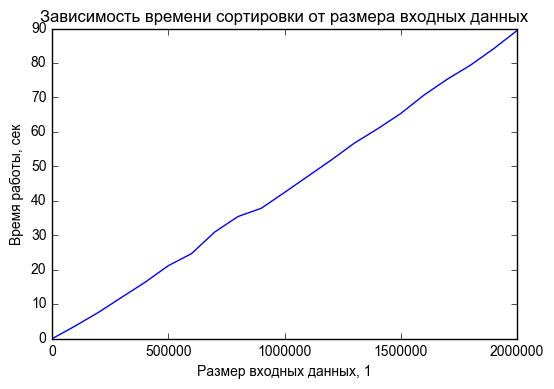

In [9]:
# Графическое представление времени выполнения.
matplotlib.rc('font', family='Arial')
plt.title('Зависимость времени сортировки от размера входных данных')
plt.ylabel('Время работы, сек')
plt.xlabel('Размер входных данных, 1')
plt.plot(completed_tests, time)

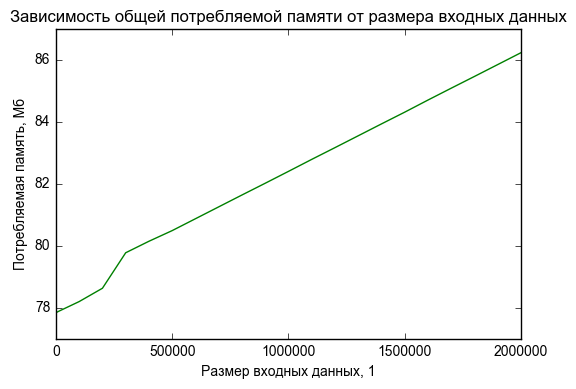

In [10]:
# Графическое представление общей потребляемой памяти.
matplotlib.rc('font', family='Arial')
plt.title('Зависимость общей потребляемой памяти от размера входных данных')
plt.ylabel('Потребляемая память, Мб')
plt.xlabel('Размер входных данных, 1')
plt.plot(completed_tests, overall_memory, 'g-')

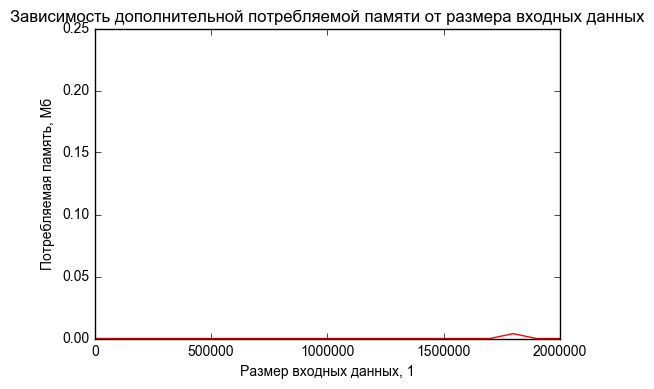

In [11]:
# Графическое представление дополнительной потребляемой памяти.
matplotlib.rc('font', family='Arial')
plt.title('Зависимость дополнительной потребляемой памяти от размера входных данных')
plt.ylabel('Потребляемая память, Мб')
plt.xlabel('Размер входных данных, 1')
plt.plot(completed_tests, memory_difference, 'r-')